<a href="https://colab.research.google.com/github/rud-rax/nlp-p2.2/blob/Jakob/notebooks/1_data_loading_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Loading and Initial Preprocessing

This notebook handles loading the dataset and creating the initial similarity matrix using Spearman's rank correlation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

# Set up for displaying plots
%matplotlib inline
plt.style.use('ggplot')
sns.set(font_scale=1.2)

## Load the Dataset

The dataset contains the participant's card sorting data for cyber attack consequences.

In [8]:
# Load the Excel file
file_path = 'drive/MyDrive/NLP 2_2/all_data.xlsx'
data = pd.read_excel(file_path)

# Display basic information about the dataset
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (226, 53)


/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Participant #,Group #,The cyber-attacker accessed your computer files.,The cyber-attacker accessed your computer programs.,The cyber-attacker accessed your information stored in an Internet site.,The cyber-attacker caused a program on your computer to crash.,The cyber-attacker caused your computer program to run very slowly.,The cyber-attacker caused your computer to crash.,The cyber-attacker caused your computer to run very slowly.,The cyber-attacker caused your Internet connection to run very slowly.,...,The cyber-attacker prevented you from using your computer until you pay a ransom.,The cyber-attacker removed your computer files in order to hide their activities.,The cyber-attacker rerouted your Internet requests to a device that they control.,The cyber-attacker saw what was presented on your computer screen.,The cyber-attacker sent you an email that asks you to click on a given Internet link.,The cyber-attacker sent you an email that asks you to respond with certain personal information.,The cyber-attacker shut down an Internet site that you were using.,The cyber-attacker took control over one of your financial accounts.,The cyber-attacker used your computer to store and distribute stolen software.,
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,NaN
2,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN


## Extract Document Descriptions

The columns C to AZ are the attack consequences descriptions (our document set).

In [9]:
# Extract columns C to AZ (document descriptions)
# Excel columns C to AZ correspond to indices 2 to 51 (if 0-indexed)
document_columns = data.columns[2:52]  # Adjust this range as needed based on your dataset
documents_df = data[document_columns]

# Display the document descriptions
print(f"Number of documents: {len(document_columns)}")
print("\nDocument descriptions (first 5):")
for i, col in enumerate(document_columns[:5]):
    print(f"Document {i+1}: {col}")

# Create a list of just the document texts (column names)
document_texts = list(document_columns)

# Save document texts for later use
with open('document_texts.txt', 'w') as f:
    for doc in document_texts:
        f.write(f"{doc}\n")

Number of documents: 50

Document descriptions (first 5):
Document 1: The cyber-attacker accessed your computer files.
Document 2: The cyber-attacker accessed your computer programs.
Document 3: The cyber-attacker accessed your information stored in an Internet site.
Document 4: The cyber-attacker caused a program on your computer to crash.
Document 5: The cyber-attacker caused your computer program to run very slowly.


## Create Initial Similarity Matrix using Spearman's Rank Correlation

We'll use the vectors from the card sorting process to create a pairwise similarity matrix.

In [10]:
def create_spearman_matrix(df):
    """
    Create a pairwise similarity matrix using Spearman's rank correlation
    for the given dataframe of document vectors.

    Args:
        df: DataFrame containing document vectors as columns

    Returns:
        Numpy array containing the pairwise similarity matrix
    """
    n_docs = len(df.columns)
    sim_matrix = np.zeros((n_docs, n_docs))

    # For each pair of documents, calculate Spearman correlation
    for i in tqdm(range(n_docs)):
        for j in range(n_docs):
            # Get the two document vectors
            vec1 = df.iloc[:, i].values
            vec2 = df.iloc[:, j].values

            # Calculate Spearman correlation
            corr, _ = spearmanr(vec1, vec2)
            sim_matrix[i, j] = corr

    return sim_matrix

In [19]:
%cd 'drive/MyDrive/NLP 2_2'

[Errno 2] No such file or directory: 'drive/MyDrive/NLP 2_2'
/content/drive/MyDrive/NLP 2_2


100%|██████████| 50/50 [00:04<00:00, 10.71it/s]


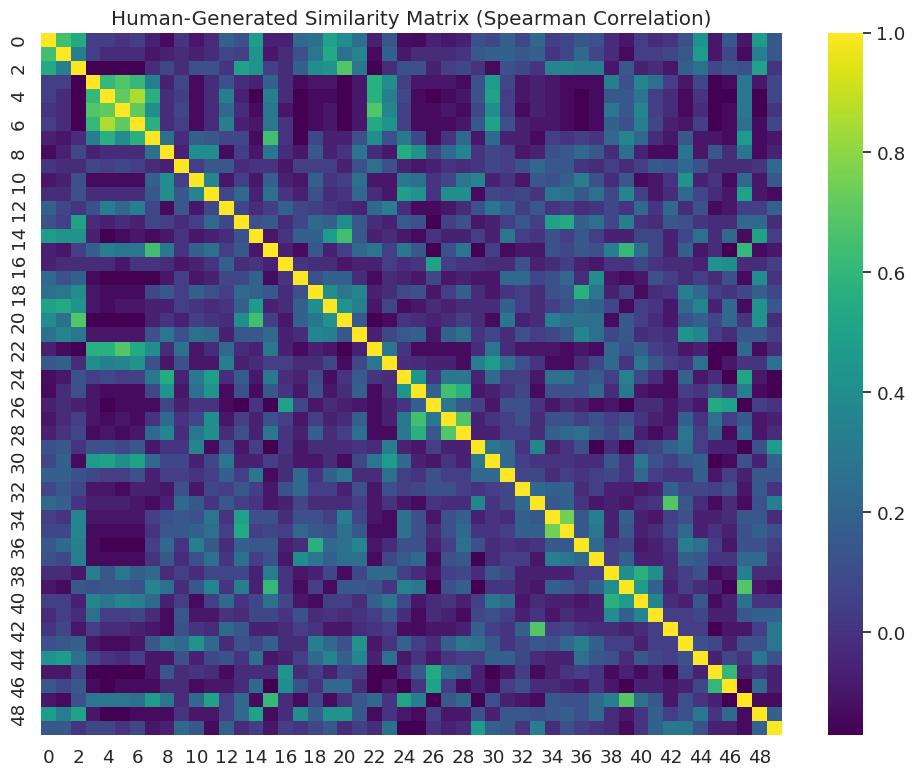

In [21]:
# Create the initial similarity matrix
human_similarity_matrix = create_spearman_matrix(documents_df)

# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(human_similarity_matrix, cmap='viridis')
plt.title('Human-Generated Similarity Matrix (Spearman Correlation)')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/NLP 2_2/human_similarity_matrix.png', dpi=300)
plt.show()

# Save the matrix for later comparison
np.save('/content/drive/MyDrive/NLP 2_2/human_similarity_matrix.npy', human_similarity_matrix)

## Save Document Texts to CSV

We'll save the document texts to a CSV file for easier processing in the next notebooks.

In [16]:
# Create a dataframe with document texts and save to CSV
docs_df = pd.DataFrame({
    'document_id': [f'doc_{i+1}' for i in range(len(document_texts))],
    'text': document_texts
})

docs_df.to_csv('documents.csv', index=False)
print("Documents saved to CSV.")
docs_df.head()

Documents saved to CSV.


,document_id,text
0,doc_1,The cyber-attacker accessed your computer files.
1,doc_2,The cyber-attacker accessed your computer prog...
2,doc_3,The cyber-attacker accessed your information s...
3,doc_4,The cyber-attacker caused a program on your co...
4,doc_5,The cyber-attacker caused your computer progra...


In [22]:
# Load documents from CSV
docs_df = pd.read_csv('documents.csv')
document_texts = docs_df['text'].tolist()

# Load the original human similarity matrix for comparison later
human_similarity_matrix = np.load('human_similarity_matrix.npy')

print(f"Loaded {len(document_texts)} documents")
print(f"Human similarity matrix shape: {human_similarity_matrix.shape}")

# Display a few document texts
for i, text in enumerate(document_texts[:5]):
    print(f"Document {i+1}: {text}")

Loaded 50 documents
Human similarity matrix shape: (50, 50)
Document 1: The cyber-attacker accessed your computer files.
Document 2: The cyber-attacker accessed your computer programs.
Document 3: The cyber-attacker accessed your information stored in an Internet site.
Document 4: The cyber-attacker caused a program on your computer to crash.
Document 5: The cyber-attacker caused your computer program to run very slowly.
